## Load Data From CSV file

In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
df = pd.read_csv('./datasets/Customer.csv')
df.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


# Preprocessing Data

In [5]:
df.dtypes

CustomerID                 int64
Gender                    object
Age                        int64
Annual Income (k$)         int64
Spending Score (1-100)     int64
dtype: object

### Gender labeling

In [6]:
df['Gender'] = df['Gender'].astype('category').cat.codes
df.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,1,19,15,39
1,2,1,21,15,81
2,3,0,20,16,6
3,4,0,23,16,77
4,5,0,31,17,40


In [7]:
df.describe()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
count,200.000000,200.000000,200.000000,200.000000,200.000000
mean,100.500000,0.440000,38.850000,60.560000,50.200000
std,57.879185,0.497633,13.969007,26.264721,25.823522
min,1.000000,0.000000,18.000000,15.000000,1.000000
25%,50.750000,0.000000,28.750000,41.500000,34.750000
50%,100.500000,0.000000,36.000000,61.500000,50.000000
75%,150.250000,1.000000,49.000000,78.000000,73.000000
max,200.000000,1.000000,70.000000,137.000000,99.000000


## Normalize Data

In [8]:
from sklearn.preprocessing import MinMaxScaler
X = df.values
scaler = MinMaxScaler()
dataset = scaler.fit_transform(X)
dataset[0:5]

array([[0.        , 1.        , 0.01923077, 0.        , 0.3877551 ],
       [0.00502513, 1.        , 0.05769231, 0.        , 0.81632653],
       [0.01005025, 0.        , 0.03846154, 0.00819672, 0.05102041],
       [0.01507538, 0.        , 0.09615385, 0.00819672, 0.7755102 ],
       [0.0201005 , 0.        , 0.25      , 0.01639344, 0.39795918]])

# Clustering
First, we calculate the distance matrix

In [9]:
import pylab
from scipy.cluster import hierarchy

In [10]:
from sklearn.metrics.pairwise import euclidean_distances
dist_matrix = euclidean_distances(dataset,dataset) 
print(dist_matrix)

[[0.         0.43032315 1.055428   ... 1.41345435 1.44858323 1.49877657]
 [0.43032315 0.         1.25942674 ... 1.35931186 1.56141421 1.42138915]
 [1.055428   1.25942674 0.         ... 1.818757   1.73838961 1.902105  ]
 ...
 [1.41345435 1.35931186 1.818757   ... 0.         0.57852001 0.13469899]
 [1.44858323 1.56141421 1.73838961 ... 0.57852001 0.         0.66439853]
 [1.49877657 1.42138915 1.902105   ... 0.13469899 0.66439853 0.        ]]


In [11]:
Z_using_dist_matrix = hierarchy.linkage(dist_matrix, 'complete')

C:\Users\Pars\AppData\Local\Temp\ipykernel_3252\1633147189.py:1: ClusterWarning: The symmetric non-negative hollow observation matrix looks suspiciously like an uncondensed distance matrix
  Z_using_dist_matrix = hierarchy.linkage(dist_matrix, 'complete')


# Now, plot the dendrogram

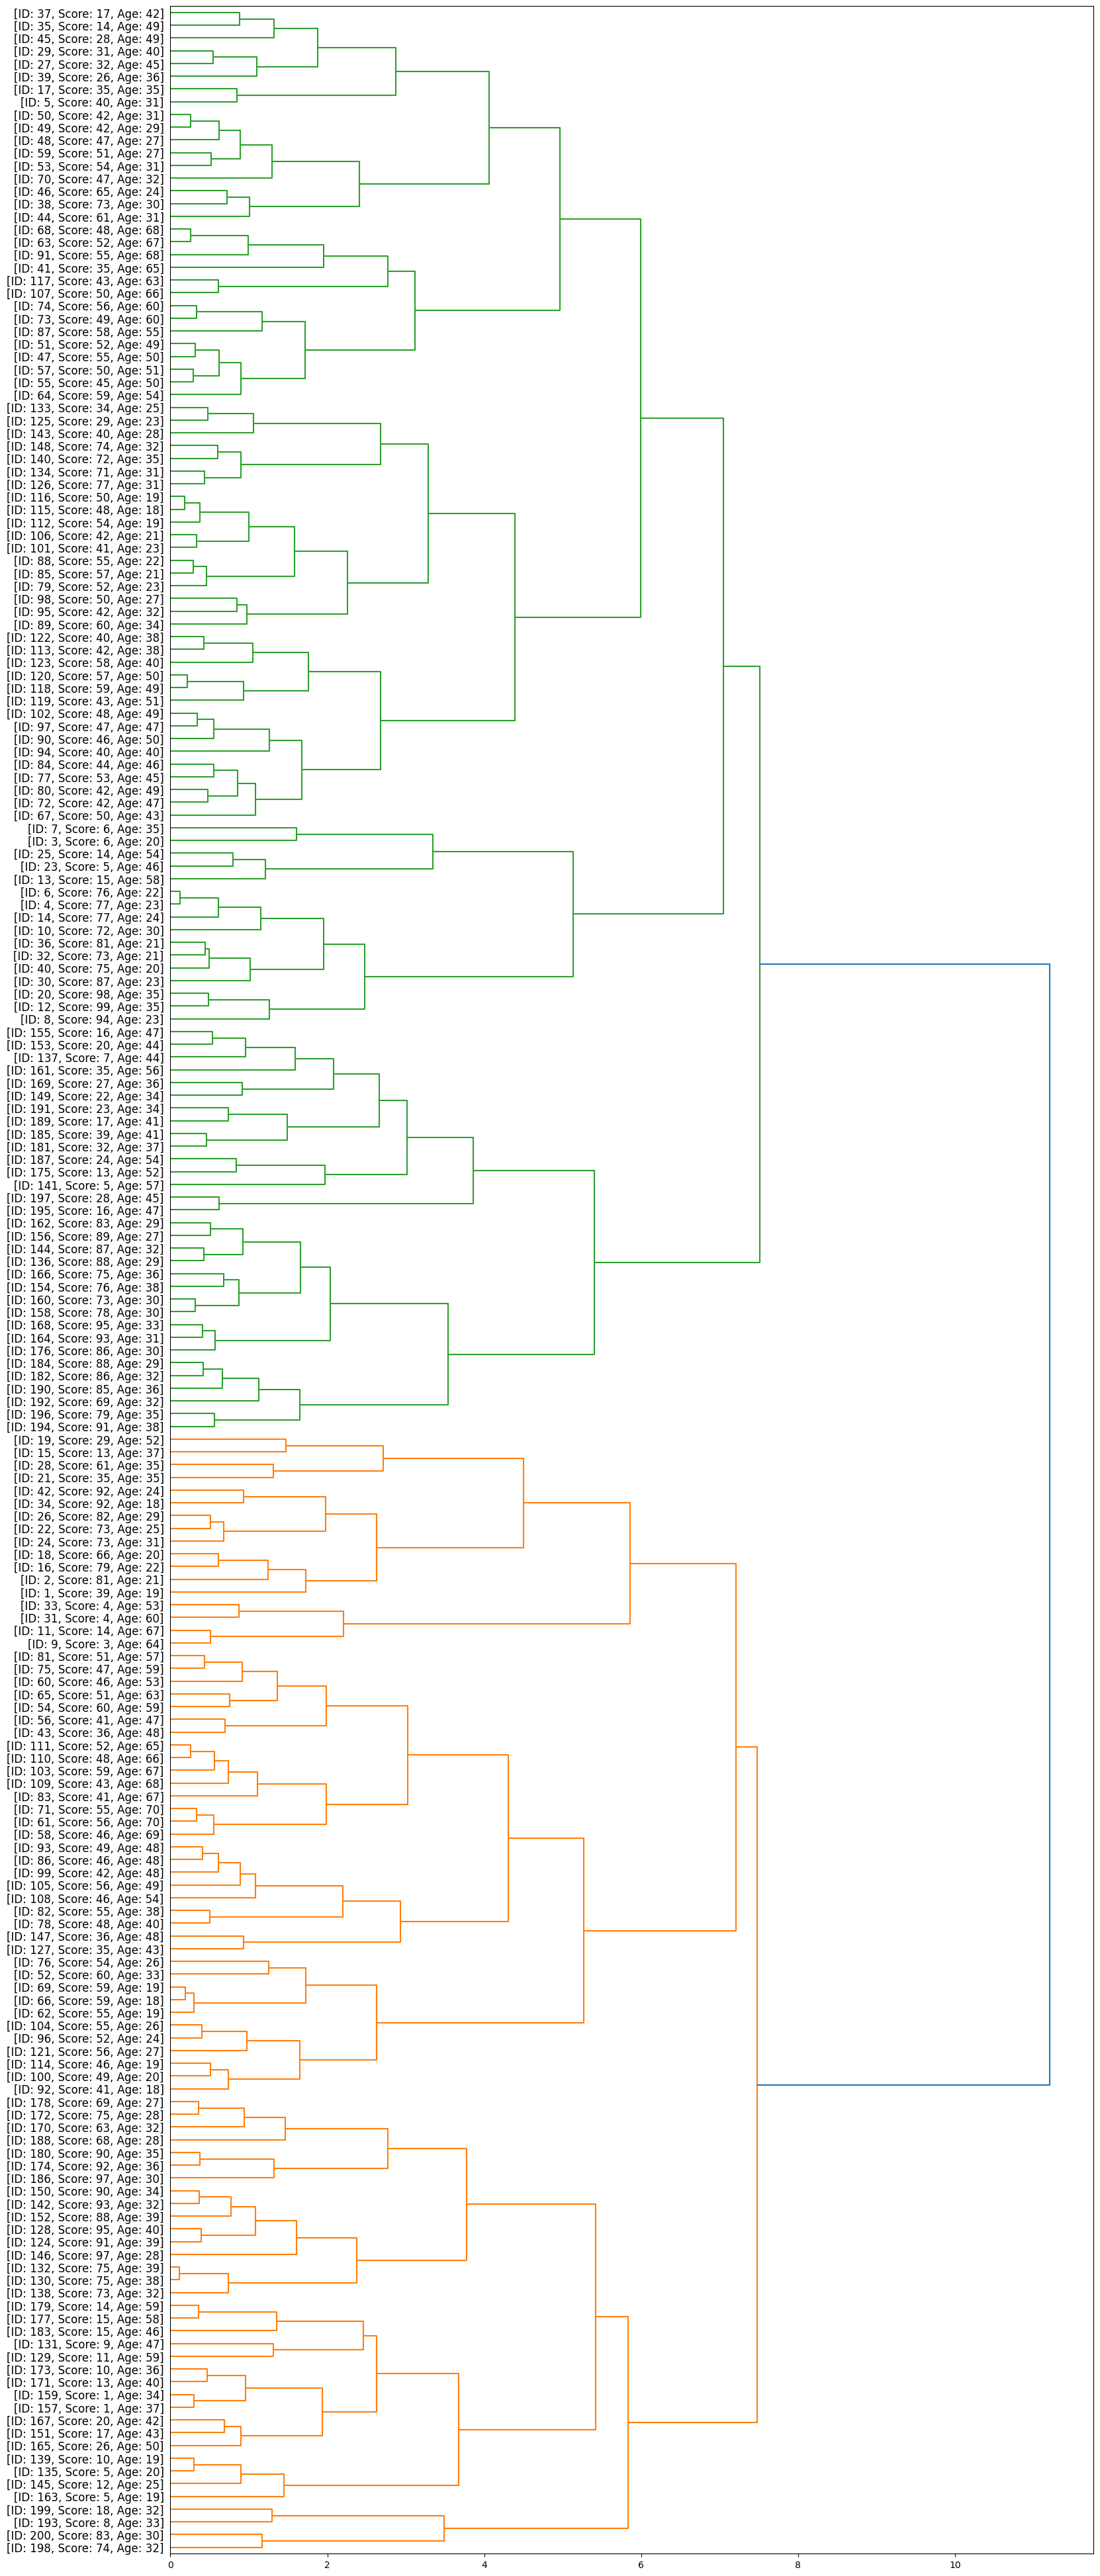

In [12]:
fig = pylab.figure(figsize=(18,50))
def llf(id):
    return '[%s %s %s]' % (f"ID: {df['CustomerID'][id]},", f"Score: {df['Spending Score (1-100)'][id]},", f"Age: {df['Age'][id]}")
    
dendro = hierarchy.dendrogram(Z_using_dist_matrix,  leaf_label_func=llf, leaf_rotation=0, leaf_font_size =12, orientation = 'right')

# AgglomerativeClustering
Now, we can use the 'AgglomerativeClustering' function from scikit-learn library to cluster the dataset. The AgglomerativeClustering performs a hierarchical clustering using a bottom up approach. The linkage criteria determines the metric used for the merge strategy

In [14]:
from sklearn.cluster import AgglomerativeClustering
agglom = AgglomerativeClustering(n_clusters = 6, linkage = 'complete')
agglom.fit(dist_matrix)

agglom.labels_

C:\Users\Pars\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\cluster\_agglomerative.py:585: ClusterWarning: The symmetric non-negative hollow observation matrix looks suspiciously like an uncondensed distance matrix
  out = hierarchy.linkage(X, method=linkage, metric=affinity)


array([1, 1, 5, 5, 0, 5, 5, 5, 1, 5, 1, 5, 5, 5, 1, 1, 0, 1, 1, 5, 1, 1,
       5, 1, 5, 1, 0, 1, 0, 5, 1, 5, 1, 1, 0, 5, 0, 0, 0, 5, 0, 1, 4, 0,
       0, 0, 0, 0, 0, 0, 0, 4, 0, 4, 0, 4, 0, 4, 0, 4, 4, 4, 0, 0, 4, 4,
       0, 0, 4, 0, 4, 0, 0, 0, 4, 4, 0, 4, 0, 0, 4, 4, 4, 0, 0, 4, 0, 0,
       0, 0, 0, 4, 4, 0, 0, 4, 0, 0, 4, 4, 0, 0, 4, 4, 4, 0, 0, 4, 4, 4,
       4, 0, 0, 4, 0, 0, 0, 0, 0, 0, 4, 0, 0, 3, 0, 0, 4, 3, 3, 3, 3, 3,
       0, 0, 3, 2, 2, 3, 3, 0, 2, 3, 0, 2, 3, 3, 4, 0, 2, 3, 3, 3, 2, 2,
       2, 2, 3, 2, 3, 2, 2, 2, 3, 2, 3, 2, 3, 2, 2, 3, 3, 3, 3, 3, 2, 2,
       3, 3, 3, 3, 2, 2, 3, 2, 2, 3, 2, 3, 2, 2, 2, 2, 3, 2, 2, 2, 2, 3,
       3, 3], dtype=int64)

#### We can add a new field to our dataframe to show the cluster of each row:

In [15]:
df['cluster_'] = agglom.labels_
df.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100),cluster_
0,1,1,19,15,39,1
1,2,1,21,15,81,1
2,3,0,20,16,6,5
3,4,0,23,16,77,5
4,5,0,31,17,40,0


## Let's see how the customers are distributed

C:\Users\Pars\AppData\Local\Temp\ipykernel_3252\2826595203.py:13: UserWarning: *c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
  plt.scatter(subset.CustomerID, subset['Spending Score (1-100)'], s= subset['Annual Income (k$)']*10, c=color, label='cluster'+str(label),alpha=0.5)
C:\Users\Pars\AppData\Local\Temp\ipykernel_3252\2826595203.py:13: UserWarning: *c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
  plt.scatter(subset.CustomerID, subset['Spending Score (1

Text(0, 0.5, 'Score')

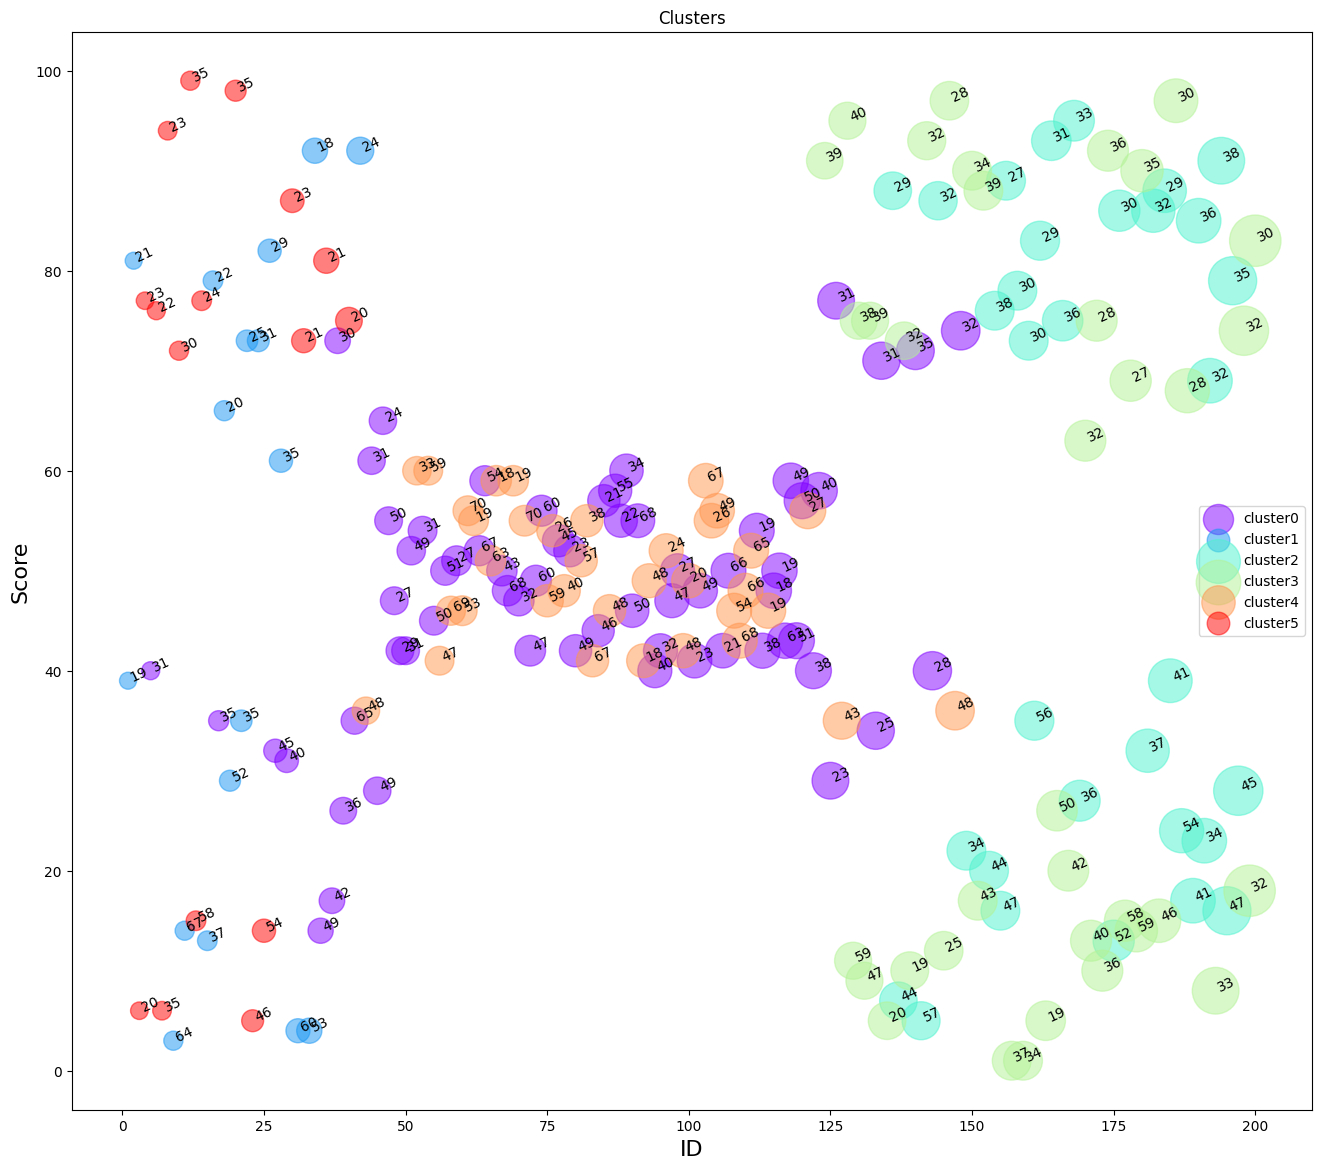

In [16]:
import matplotlib.cm as cm
n_clusters = max(agglom.labels_)+1
colors = cm.rainbow(np.linspace(0, 1, n_clusters))
cluster_labels = list(range(0, n_clusters))

# Create a figure of size 6 inches by 4 inches.
plt.figure(figsize=(16,14))

for color, label in zip(colors, cluster_labels):
    subset = df[df.cluster_ == label]
    for i in subset.index:
            plt.text(subset.CustomerID[i], subset['Spending Score (1-100)'][i],str(subset['Age'][i]), rotation=25) 
    plt.scatter(subset.CustomerID, subset['Spending Score (1-100)'], s= subset['Annual Income (k$)']*10, c=color, label='cluster'+str(label),alpha=0.5)
#    plt.scatter(subset.horsepow, subset.mpg)
plt.legend()
plt.title('Clusters')
plt.xlabel('ID', fontsize= 16)
plt.ylabel('Score', fontsize= 16)